# Krittika Convener Selection
## Python Assignment

1. You may find the KSP tutorials useful: https://github.com/krittikaiitb/tutorials - Tutorials 1,2,3, and 4 are particularly relevant. These cover basic python, numpy, functions in python and matplotlib respectively.

2. A helpful reminder that executing a cell with help (for example: help(np.loadtxt) or np.loadtxt?) will show the documentation for that function.

3. The use of internet is completely ALLOWED for solving this assignment.

4. Feel free to use multiple cells for your solutions, this would make your code easier to understand in a step-by-step fashion. But keep them separate for each question (don't use a cell to solve Q1 after Q2).

5. Try to keep your code neat and make use of comments and/or markdown cells to explain what you have done.

In [9]:
# try to put all your imports here
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

### Q1: Parsing Form Responses
Suppose that you are a convener and it has been a few months into your tenure. We have organized an event focused at the newly joining freshers(your juniors).

We floated a Google form to collect their details and get them registered. We planned to contact them all via WebMail to send them details of the event.

While going through the responses, you discover that your co-convener forgot to filter inputs in the form! There appear to be many invalid roll numbers - we cannot contact these students via WebMail. Here are the first few entries:

| Sr. No. | Name | Roll Number | Contact Number |
|---------|------|-------------|----------------|
| 1       | MV   | 220070044   | 986937546      |
| 2       | DV   | 22b280013   | 961101307      |
| 3       | RR   | 21070042    | 908204532      |
| 4       | YB   | 220030019   | 947226579      |

As you can see, we can already see an erroneous LDAP in the $3$rd input.

Your task here is to find out the submissions with wrong roll numbers and filter them out. We would reach out to such people using their contact numbers. Your final output should be the names and contact numbers of these people.

*PS : As you might suspect, this data is sourced from an actual event from our tenure. It has been anonymized and the errors have been exaggerated :)*

In [10]:
file1 = 'Dataset_Q1.csv' #this is the CSV file that countains all the responses
file3 = 'Dataset_Q2_filtered.csv'  # CSV in which filtered table will be stored

Feel free to use any libraries/standard functions that you might need to solve this problem.

In [11]:
# Solution code
file_in = open(file1,'r')
file_out = open(file3,'w')
form_entries = file_in.read().split('\n')
del form_entries[-1]
i=0
print("Displaying all erroneous submissions:")
while i<len(form_entries):
    form_entries[i]=form_entries[i].split(',')
    form_entries[i][2]=form_entries[i][2].strip()   # removing all trailing and leading whitespaces so that they do not affect the condition
    if i!=0 and (len(form_entries[i][2])!=9 or form_entries[i][2][0:2] not in ('20','21','22')):     
        print(','.join(form_entries[i]))            # erroneous entries are those in which:                                                 
        del form_entries[i]                         #       roll number is not exactly 9 digits long                                                 
    else:                                           #       first two digits of roll number are not like 20, 21 or 22
        i+=1
for i in range(len(form_entries)):
    if i!=0:
        form_entries[i][0]=str(i)
    file_out.write(','.join(form_entries[i])+'\n')  #converting the list back into CSV format
file_in.close()
file_out.close()

Displaying all erroneous submissions:
3,RR,21070042,908204532
11,BP,2230100228,980849718
21,SP,22026005,936914944
32,JS,21070024,979691534
49,PM,20350117,996497703
56,VN,2200700008,918746674
60,SN,2241800005,902766352
64,AR,22026008,992993873
83,SS,21020016,914286714
86,DS,320003699,914030157
95,AB,2200020034,934220771
102,MM,22007054,918359105


#### Bonus part:
Amongst the valid entries, what proportion are actually freshers? Remember that we intended to target them with this event. The majority seem to be freshers but you will also find some second and third year students. You can identify each of these groups by the first two digits of their roll numbers. 

Your task is to graphically depict the number of applicants across the three batches.

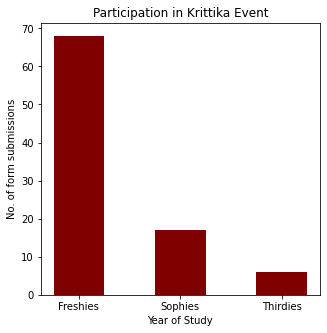

In [12]:
# Solution code
year=['Freshies','Sophies','Thirdies']
students_from_year=[0,0,0]                                           #initializing the list
i=1
while i<len(form_entries):
    students_from_year[2-int(form_entries[i][2][1])]+=1              #updating the counter of relevant index
    i+=1
fig = plt.figure(figsize = (5, 5))
plt.bar(year, students_from_year, color ='maroon',width = 0.5)       #plotting bar graph
plt.xlabel("Year of Study")
plt.ylabel("No. of form submissions")
plt.title("Participation in Krittika Event")
plt.show()

### Q2: A New Discovery
During one of our regular stargazing sessions, you and your co-conveners discover a new blip of light that shouldn't be there. After examining it a bit, you realise that this object is not quite like anything the world has seen before. You share your data with club seniors and make a startling find - its the first of its kind of a completely new class of objects. An ex-secy of the club, Siddhant Tripathy, analyses it extensively and declares that its actually the first ever **endoplanet** to be found. You and your team are now international celebrities, but its time to organise an event so that people from insti can see this.

Your task is to find out when exactly Tripps' endoplanet would be at its brightest and organise a stargazing session on that date so that everyone can see it for themselves. You have data from a month of observations of this object and you need to extrapolate it to find the peak.

In [13]:
file2 = 'Dataset_Q2.csv'

According to your analysis, this object is in a special orbit that gives it a roughly Gaussian light curve i.e. the plot of [magnitude](https://en.wikipedia.org/wiki/Apparent_magnitude) v/s time roughly follows an inverted Gaussian function. Recall that a generic Gaussian function with unit amplitude is given by

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left({-\frac{1}{2}{\left(\frac{x-\mu}{\sigma}\right)}^2}\right)$$ 

where $\mu$ is the mean of the distribution it describes and $\sigma$ is the standard deviation. More about it [here](https://archive.lib.msu.edu/crcmath/math/math/g/g087.htm).

Your task is to find the date at which the endoplanet will be at it's brightest, along with how bright its expected to be. Also plot the original data along with the fitted curve.

You can do this by fitting a gaussian to the light curve data and locating its extremum. You may find `scipy.optimize.curve_fit` useful. 

**Important** : Our fit function must be a Gaussian with a vertical offset. The problem is that `curve_fit` tends to misbehave in this particular example when you ask it to guess that offset, so assume it to be $9.0$ to solve this problem. This, of course, implies that the baseline magnitude of the object is $9.0$

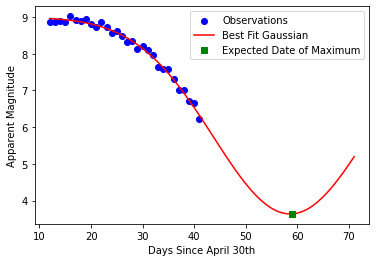

Day of maximum brightness (expected): Jun 28


In [14]:
# Solution code
def gaussian(x, amplitude, mean, stddev):
    return 9.0+amplitude * np.exp(-((x - mean) / 4 / stddev)**2)
    
with open(file2,'r') as f:
    data=f.read().split('\n')
    del data[0], data[-1]

x=[] #initializing containers for plotting data
y=[]

for i in range(len(data)):
    data[i]=data[i].split(',')
    date=data[i][1]
    # converting DDMM format to 'Days since April 30st'
    if 'May' in date:
        date_in_int=int(date[:date.find('-')])
    elif 'Jun' in date:
        date_in_int=int(date[:date.find('-')])+31
    magnitude=data[i][2]
    x.append(date_in_int)
    y.append(float(magnitude))

popt, pcov = optimize.curve_fit(gaussian, x, y) # scipy handles the curve fitting

x_longer=[x[0]+i for i in range(60)] # making an extended list to show where maximum brightness occurs

date_of_maximum=round(popt[1])  # maximum for gaussian occurs at mean

plt.scatter(x, y, c ="blue")
plt.plot(x_longer, gaussian(x_longer, *popt),'r-')
plt.plot(date_of_maximum,gaussian(date_of_maximum, *popt),'gs')
plt.xlabel("Days Since April 30th")
plt.ylabel("Apparent Magnitude")
plt.legend(["Observations","Best Fit Gaussian","Expected Date of Maximum"])
# To show the plot
plt.show()

if date_of_maximum>61:
    date_of_maximum-=61
    month='Jul'
elif date_of_maximum>31:
    date_of_maximum-=31
    month='Jun'
else:
    month='May'
print("Day of maximum brightness (expected):",month,date_of_maximum,sep=' ')

#### Bonus part:

Can this date be trusted? We wouldn't want to claim the endoplanet is the brightest on a particular day and then have it brighten up even more later. Try to ascertain the error in this predicted date. Read the documentation of `curve_fit` and try to understand the statistical significance of the quantities it returns.

In [15]:
# Solution code
print("Level of Precision for the unknown parameters of gaussian function:")
# use the fact that diagonals of covariance matrix gives us the variance of each parameter
print(f"Amplitude:           {popt[0]:.3f} ± {np.sqrt(pcov[0][0]):.3f}") 
print(f"Mean:                {popt[1]:.3f} ± {np.sqrt(pcov[1][1]):.3f}") 
print(f"Standard Deviation:  {popt[2]:.3f} ± {np.sqrt(pcov[2][2]):.3f}") 

Level of Precision for the unknown parameters of gaussian function:
Amplitude:           -5.366 ± 1.786
Mean:                58.611 ± 6.213
Standard Deviation:  -5.283 ± 0.666
